<a href="https://colab.research.google.com/github/iftik-OP/Celebal-Summer-Intern/blob/final-project/gensolve_round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install svgwrite cairosvg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import cairosvg
from google.colab import files

# Unzip the file
!unzip problems.zip

# Function to read CSV files
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, title):
    colours = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))

    # Find the maximum y-value for inversion
    max_y = 0
    for XYs in paths_XYs:
        for XY in XYs:
            if XY.ndim == 2:  # Ensure it's a 2D array
                max_y = max(max_y, np.max(XY[:, 1]))

    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            if XY.ndim == 2:  # Ensure it's a 2D array
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
            elif XY.ndim == 1 and len(XY) == 2:  # Handle the case where XY is a single point
                ax.plot([XY[0]], [XY[1]], 'o', c=c, linewidth=2)

    ax.set_aspect('equal')
    ax.set_title(title)
    plt.show()


def polylines2svg ( paths_XYs , svg_path ):
  W , H = 0 , 0
    for path_XYs in paths_XYs :
      for XY in path_XYs :
        W , H = max (W , np .max ( XY [: , 0])) , max (H , np .max ( XY [: , 1]))
        padding = 0.1
        W , H = int ( W + padding * W ) , int ( H + padding * H )
        # Create a new SVG drawing
        dwg = svgwrite . Drawing ( svg_path , profile = ' tiny ' ,
        shape_rendering = 'crispEdges ')
        group = dwg . g ()
        for i , path in enumerate ( paths_XYs ):
          path_data = []
          c = colours [ i % len( colours )]
          for XY in path :
            path_data . append (( " M " , ( XY [0 , 0] , XY [0 , 1])))
            for j in range (1 , len( XY )):
              path_data . append (( " L " , ( XY [j , 0] , XY [j , 1])))
              if not np . allclose ( XY [0] , XY [ -1]):
                path_data . append (( " Z " , None ))
                group . add ( dwg . path ( d = path_data , fill =c ,
                stroke = ' none ' , stroke_width =2))
                dwg . add ( group )
                dwg . save ()
                png_path = svg_path . replace ( '. svg ' , '. png ')
                fact = max (1 , 1024 // min (H , W ))
                cairosvg . svg2png ( url = svg_path , write_to = png_path ,
                parent_width =W , parent_height =H ,
                output_width = fact *W , output_height = fact *H ,
                background_color = ' white ')
  return

IndentationError: unexpected indent (<ipython-input-32-6049439a8d2a>, line 49)

In [ ]:
import numpy as np
from scipy import optimize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def regularize_curves(paths):
    regularized_paths = []
    for path in paths:
        if is_straight_line(path):
            regularized_paths.append(regularize_line(path))
        elif is_circle(path):
            regularized_paths.append(regularize_circle(path))
        elif is_ellipse(path):
            regularized_paths.append(regularize_ellipse(path))
        elif is_rectangle(path):
            regularized_paths.append(regularize_rectangle(path))
        elif is_regular_polygon(path):
            regularized_paths.append(regularize_regular_polygon(path))
        elif is_star_shape(path):
            regularized_paths.append(regularize_star_shape(path))
        else:
            regularized_paths.append(path)  # Keep original if no regularization applies
    return regularized_paths

def is_straight_line(path):
    # Ensure the path is a NumPy array
    path = np.array(path)

    # Debugging: Print shapes of X and y
    print(f"Path shape: {path.shape}")

    # Check if path has at least 2 points
    if path.shape[0] < 2:
        print("Path has fewer than 2 points. Skipping this path.")
        return False

    # Reshape and fit the linear model
    X = path[:, 0].reshape(-1, 1)
    y = path[:, 1]

    # Debugging: Check lengths of X and y
    print(f"Length of X: {len(X)}, Length of y: {len(y)}")

    # Ensure X and y are of the same length
    if len(X) != len(y):
        print("Inconsistent number of samples between X and y.")
        return False

    model = LinearRegression().fit(X, y)

    # Check the R^2 value to determine if it's a straight line
    r_squared = model.score(X, y)
    return r_squared > 0.99  # You can adjust this threshold as needed

def regularize_line(path):
    X = path[:, 0].reshape(-1, 1)
    y = path[:, 1]
    model = LinearRegression().fit(X, y)
    start_x, end_x = np.min(X), np.max(X)
    return np.array([[start_x, model.predict([[start_x]])[0]],
                     [end_x, model.predict([[end_x]])[0]]])

def is_circle(path):
    # Ensure the path is a NumPy array
    path = np.array(path)

    # Extract x and y coordinates
    x, y = path[:, 0], path[:, 1]

    # Calculate the mean of x and y coordinates
    x_m, y_m = np.mean(x), np.mean(y)

    # Calculate the radius as the mean distance from the mean point
    radius = np.mean(np.sqrt((x - x_m) ** 2 + (y - y_m) ** 2))

    # Calculate the differences between each point's distance to the center and the mean radius
    differences = np.abs(np.sqrt((x - x_m) ** 2 + (y - y_m) ** 2) - radius)

    # Check if all the differences are below a small threshold, indicating a circle
    return np.all(differences < 1e-2)  # Adjust the tolerance if needed
def regularize_circle(path):
    # Check if the path is in the expected shape
    if len(path) == 1:
        path = path[0]  # Extract the 2D array from the 3D structure

    # Ensure the path is a NumPy array
    path = np.array(path)

    # Extract x and y coordinates
    x, y = path[:, 0], path[:, 1]

    # Calculate the mean of x and y coordinates
    x_m, y_m = np.mean(x), np.mean(y)

    # Calculate the radius as the mean distance from the mean point
    radius = np.mean(np.sqrt((x - x_m) ** 2 + (y - y_m) ** 2))

    # Calculate the regularized circle points
    angle = np.arctan2(y - y_m, x - x_m)
    regularized_x = x_m + radius * np.cos(angle)
    regularized_y = y_m + radius * np.sin(angle)

    # Return the regularized path
    return np.column_stack((regularized_x, regularized_y))

def is_ellipse(path):
    def fit_ellipse(x, y):
        D = np.column_stack((x**2, x*y, y**2, x, y, np.ones_like(x)))
        S = np.dot(D.T, D)
        C = np.zeros((6, 6))
        C[0, 2] = C[2, 0] = 2; C[1, 1] = -1
        E, V = np.linalg.eig(np.dot(np.linalg.inv(S), C))
        n = np.argmax(np.abs(E))
        return V[:, n]

    x, y = path[:, 0], path[:, 1]
    params = fit_ellipse(x, y)
    a, b, c, d, e, f = params

    center_x = (b*e - 2*c*d) / (4*a*c - b**2)
    center_y = (b*d - 2*a*e) / (4*a*c - b**2)

    error = np.mean(np.abs(a*x**2 + b*x*y + c*y**2 + d*x + e*y + f))
    return error < 0.1  # Adjust threshold as needed

def regularize_ellipse(path):
    def ellipse_points(a, b, center_x, center_y, angle, num_points=100):
        t = np.linspace(0, 2*np.pi, num_points)
        x = a * np.cos(t)
        y = b * np.sin(t)
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                    [np.sin(angle), np.cos(angle)]])
        xy = np.dot(rotation_matrix, np.array([x, y]))
        x, y = xy
        x += center_x
        y += center_y
        return np.column_stack((x, y))

    x, y = path[:, 0], path[:, 1]
    params = fit_ellipse(x, y)
    a, b, c, d, e, f = params

    center_x = (b*e - 2*c*d) / (4*a*c - b**2)
    center_y = (b*d - 2*a*e) / (4*a*c - b**2)

    num = 2*c*center_x**2 + 2*a*center_y**2 + 2*b*center_x*center_y - 2*d*center_x - 2*e*center_y + f
    den1 = 2*(a*center_y**2 + c*center_x**2 - d*center_x - e*center_y + f)
    den2 = 2*(a*center_x**2 + c*center_y**2 - d*center_y - e*center_x + f)

    width = 2 * np.sqrt(num / den1)
    height = 2 * np.sqrt(num / den2)

    angle = 0.5 * np.arctan2(b, a - c)

    return ellipse_points(width/2, height/2, center_x, center_y, angle)

def is_rectangle(path):
    # Check if the shape has 4 corners
    if len(path) != 4:
        return False

    # Calculate edge vectors
    edges = np.roll(path, -1, axis=0) - path

    # Check if opposite edges are parallel and equal in length
    for i in range(2):
        if not np.allclose(edges[i], -edges[i+2], atol=0.1):
            return False

    # Check if adjacent edges are perpendicular
    for i in range(4):
        dot_product = np.dot(edges[i], edges[(i+1)%4])
        if abs(dot_product) > 0.1:
            return False

    return True

def regularize_rectangle(path):
    # Calculate the center of the rectangle
    center = np.mean(path, axis=0)

    # Calculate the two principal directions
    edges = np.roll(path, -1, axis=0) - path
    direction1 = edges[0] / np.linalg.norm(edges[0])
    direction2 = edges[1] / np.linalg.norm(edges[1])

    # Calculate the dimensions of the rectangle
    width = np.dot(edges[0], direction1)
    height = np.dot(edges[1], direction2)

    # Generate the regularized rectangle
    corners = np.array([
        center + width/2 * direction1 + height/2 * direction2,
        center - width/2 * direction1 + height/2 * direction2,
        center - width/2 * direction1 - height/2 * direction2,
        center + width/2 * direction1 - height/2 * direction2
    ])

    return corners

def is_regular_polygon(path, tolerance=0.1):
    n = len(path)
    if n < 3:
        return False

    # Calculate edge lengths
    edges = np.roll(path, -1, axis=0) - path
    edge_lengths = np.linalg.norm(edges, axis=1)

    # Check if all edge lengths are approximately equal
    if not np.allclose(edge_lengths, edge_lengths[0], rtol=tolerance):
        return False

    # Calculate interior angles
    angles = np.zeros(n)
    for i in range(n):
        v1 = edges[i]
        v2 = -edges[(i-1)%n]
        angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
        angles[i] = angle

    # Check if all interior angles are approximately equal
    expected_angle = (n-2) * np.pi / n
    return np.allclose(angles, expected_angle, rtol=tolerance)

def regularize_regular_polygon(path):
    n = len(path)
    center = np.mean(path, axis=0)

    # Calculate the average radius
    radii = np.linalg.norm(path - center, axis=1)
    radius = np.mean(radii)

    # Generate regularized polygon
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    regularized = center + radius * np.column_stack((np.cos(angles), np.sin(angles)))

    return regularized

def is_star_shape(path, tolerance=0.2):
    n = len(path)
    if n < 5 or n % 2 != 0:
        return False

    center = np.mean(path, axis=0)

    # Calculate distances from center to each point
    distances = np.linalg.norm(path - center, axis=1)

    # Check if alternating distances are similar
    long_distances = distances[::2]
    short_distances = distances[1::2]

    if not (np.allclose(long_distances, long_distances[0], rtol=tolerance) and
            np.allclose(short_distances, short_distances[0], rtol=tolerance) and
            np.mean(long_distances) > np.mean(short_distances)):
        return False

    # Check angles between points
    angles = np.arctan2(path[:, 1] - center[1], path[:, 0] - center[0])
    angle_diffs = np.diff(np.sort(angles))
    angle_diffs = np.append(angle_diffs, 2*np.pi - np.sum(angle_diffs))

    expected_angle = 4*np.pi / n
    return np.allclose(angle_diffs, expected_angle, rtol=tolerance)

def regularize_star_shape(path):
    n = len(path)
    center = np.mean(path, axis=0)

    # Calculate average long and short radii
    distances = np.linalg.norm(path - center, axis=1)
    long_radius = np.mean(distances[::2])
    short_radius = np.mean(distances[1::2])

    # Generate regularized star shape
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    radii = np.array([long_radius, short_radius] * (n//2))
    regularized = center + radii[:, np.newaxis] * np.column_stack((np.cos(angles), np.sin(angles)))

    return regularized

# Helper function for ellipse fitting
def fit_ellipse(x, y):
    D = np.column_stack((x**2, x*y, y**2, x, y, np.ones_like(x)))
    S = np.dot(D.T, D)
    C = np.zeros((6, 6))
    C[0, 2] = C[2, 0] = 2; C[1, 1] = -1
    E, V = np.linalg.eig(np.dot(np.linalg.inv(S), C))
    n = np.argmax(np.abs(E))
    return V[:, n]

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

def detect_symmetry(paths):
    symmetries = []
    for path in paths:
        reflection_axes = detect_reflection_symmetry(path)
        symmetries.append(reflection_axes)
    return symmetries

def detect_reflection_symmetry(path):
    # Ensure the path is closed
    if not np.allclose(path[0], path[-1]):
        path = np.vstack((path, path[0]))

    reflection_axes = []

    # Method 1: PCA-based symmetry detection
    pca_axes = detect_symmetry_pca(path)
    reflection_axes.extend(pca_axes)

    # Method 2: Centroid-based symmetry detection
    centroid_axes = detect_symmetry_centroid(path)
    reflection_axes.extend(centroid_axes)

    # Method 3: Vertex-pair based symmetry detection
    vertex_axes = detect_symmetry_vertex_pairs(path)
    reflection_axes.extend(vertex_axes)

    # Remove duplicate axes
    reflection_axes = remove_duplicate_axes(reflection_axes)

    return reflection_axes

def detect_symmetry_pca(path):
    # Center the path
    centered_path = path - np.mean(path, axis=0)

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(centered_path)

    # The principal components are potential symmetry axes
    axes = pca.components_

    reflection_axes = []
    for axis in axes:
        if is_symmetric_along_axis(path, axis):
            reflection_axes.append(axis)

    return reflection_axes

def detect_symmetry_centroid(path):
    centroid = np.mean(path, axis=0)

    reflection_axes = []
    for i in range(len(path) - 1):
        axis = path[i] - centroid
        if is_symmetric_along_axis(path, axis):
            reflection_axes.append(axis)

    return reflection_axes

def detect_symmetry_vertex_pairs(path):
    reflection_axes = []
    n = len(path)
    for i in range(n - 1):
        for j in range(i + 1, n - 1):
            midpoint = (path[i] + path[j]) / 2
            axis = path[j] - path[i]
            if is_symmetric_along_axis(path, axis, midpoint):
                reflection_axes.append(axis)

    return reflection_axes

def is_symmetric_along_axis(path, axis, center=None):
    if center is None:
        center = np.mean(path, axis=0)

    # Normalize the axis
    axis = axis / np.linalg.norm(axis)

    # Reflect points
    reflected_path = reflect_points(path, axis, center)

    # Compare original and reflected paths
    distances = cdist(path, reflected_path)
    min_distances = np.min(distances, axis=1)

    # Check if all points have a close match
    return np.all(min_distances < 0.1)  # Adjust threshold as needed

def reflect_points(points, axis, center):
    # Translate points so that center is at origin
    translated = points - center

    # Compute reflection matrix
    reflection_matrix = np.eye(2) - 2 * np.outer(axis, axis)

    # Apply reflection
    reflected = np.dot(translated, reflection_matrix.T)

    # Translate back
    return reflected + center

def remove_duplicate_axes(axes, angle_threshold=5):
    unique_axes = []
    for axis in axes:
        is_duplicate = False
        for unique_axis in unique_axes:
            angle = np.degrees(np.arccos(np.abs(np.dot(axis, unique_axis))))
            if angle < angle_threshold or abs(angle - 180) < angle_threshold:
                is_duplicate = True
                break
        if not is_duplicate:
            unique_axes.append(axis)
    return unique_axes

# Helper function to visualize symmetry axes
def plot_symmetry_axes(path, axes, ax=None):
    import matplotlib.pyplot as plt

    if ax is None:
        fig, ax = plt.subplots()

    # Plot the shape
    ax.plot(path[:, 0], path[:, 1], 'b-')

    # Plot symmetry axes
    center = np.mean(path, axis=0)
    for axis in axes:
        normal = np.array([-axis[1], axis[0]])  # Perpendicular to axis
        ax.arrow(center[0], center[1], axis[0], axis[1], color='r', width=0.01, head_width=0.05)
        ax.arrow(center[0], center[1], -axis[0], -axis[1], color='r', width=0.01, head_width=0.05)

    ax.set_aspect('equal')
    ax.set_title('Shape with Symmetry Axes')

    if ax is None:
        plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import splprep, splev
from sklearn.cluster import DBSCAN

def complete_curves(paths):
    completed_paths = []
    for path in paths:
        completed_path = complete_curve(path)
        completed_paths.append(completed_path)
    return completed_paths

def complete_curve(path):
    # Identify the shape type
    if is_straight_line(path):
        return complete_line(path)
    elif is_circle(path):
        return complete_circle(path)
    elif is_ellipse(path):
        return complete_ellipse(path)
    elif is_rectangle(path):
        return complete_rectangle(path)
    elif is_regular_polygon(path):
        return complete_regular_polygon(path)
    elif is_star_shape(path):
        return complete_star_shape(path)
    else:
        return complete_generic_curve(path)

def complete_line(path):
    # For a line, we just need to ensure we have the endpoints
    if len(path) < 2:
        raise ValueError("Not enough points to complete a line")
    return np.array([path[0], path[-1]])

def complete_circle(path):
    # Estimate circle parameters
    center = np.mean(path, axis=0)
    radius = np.mean(np.linalg.norm(path - center, axis=1))

    # Generate complete circle
    theta = np.linspace(0, 2*np.pi, 100)
    completed_path = center + radius * np.column_stack((np.cos(theta), np.sin(theta)))
    return completed_path

def complete_ellipse(path):
    # Estimate ellipse parameters using least squares
    x, y = path[:, 0], path[:, 1]
    D = np.column_stack((x**2, x*y, y**2, x, y, np.ones_like(x)))
    S = np.dot(D.T, D)
    C = np.zeros((6, 6))
    C[0, 2] = C[2, 0] = 2; C[1, 1] = -1
    E, V = np.linalg.eig(np.dot(np.linalg.inv(S), C))
    n = np.argmax(np.abs(E))
    a = V[:, n]

    # Extract ellipse parameters
    b, c, d, f, g, a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    num = b*b-a*c
    cx = (c*d-b*f)/num
    cy = (a*f-b*d)/num

    angle = 0.5*np.arctan(2*b/(a-c))
    cos_angle, sin_angle = np.cos(angle), np.sin(angle)

    up = 2*(a*f*f+c*d*d+g*b*b-2*b*d*f-a*c*g)
    down1 = (b*b-a*c)*((c-a)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    down2 = (b*b-a*c)*((a-c)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    a = np.sqrt(abs(up/down1))
    b = np.sqrt(abs(up/down2))

    # Generate complete ellipse
    theta = np.linspace(0, 2*np.pi, 100)
    x = cx + a*cos_angle*np.cos(theta) - b*sin_angle*np.sin(theta)
    y = cy + a*sin_angle*np.cos(theta) + b*cos_angle*np.sin(theta)
    completed_path = np.column_stack((x, y))
    return completed_path

def complete_rectangle(path):
    # If we have less than 3 points, we can't reliably complete the rectangle
    if len(path) < 3:
        raise ValueError("Not enough points to complete a rectangle")

    # Calculate the center of the available points
    center = np.mean(path, axis=0)

    # Find the two principal directions
    pca = PCA(n_components=2)
    pca.fit(path - center)
    directions = pca.components_

    # Project points onto the principal directions to find the extent
    projections = np.dot(path - center, directions.T)
    min_proj = np.min(projections, axis=0)
    max_proj = np.max(projections, axis=0)

    # Reconstruct the corners of the rectangle
    corners = np.array([
        center + min_proj[0] * directions[0] + min_proj[1] * directions[1],
        center + max_proj[0] * directions[0] + min_proj[1] * directions[1],
        center + max_proj[0] * directions[0] + max_proj[1] * directions[1],
        center + min_proj[0] * directions[0] + max_proj[1] * directions[1]
    ])

    return corners

def complete_regular_polygon(path):
    # Estimate the number of sides
    n = estimate_polygon_sides(path)

    # Calculate the center and average radius
    center = np.mean(path, axis=0)
    radius = np.mean(np.linalg.norm(path - center, axis=1))

    # Generate the complete regular polygon
    theta = np.linspace(0, 2*np.pi, n+1)[:-1]
    completed_path = center + radius * np.column_stack((np.cos(theta), np.sin(theta)))
    return completed_path

def complete_star_shape(path):
    # Estimate the number of points in the star
    n = estimate_star_points(path)

    # Calculate the center and average radii
    center = np.mean(path, axis=0)
    radii = np.linalg.norm(path - center, axis=1)
    outer_radius = np.max(radii)
    inner_radius = np.min(radii)

    # Generate the complete star shape
    theta = np.linspace(0, 2*np.pi, 2*n+1)[:-1]
    r = np.array([outer_radius, inner_radius] * n)
    completed_path = center + r[:, np.newaxis] * np.column_stack((np.cos(theta), np.sin(theta)))
    return completed_path

def complete_generic_curve(path):
    # For generic curves, we'll use symmetry-based completion if possible,
    # otherwise fall back to spline interpolation

    symmetry_axes = detect_reflection_symmetry(path)
    if symmetry_axes:
        return complete_by_symmetry(path, symmetry_axes[0])
    else:
        return complete_by_spline(path)

def complete_by_symmetry(path, symmetry_axis):
    # Reflect the existing points across the symmetry axis
    center = np.mean(path, axis=0)
    reflected_points = reflect_points(path, symmetry_axis, center)

    # Combine original and reflected points
    completed_path = np.vstack((path, reflected_points))

    # Remove duplicates and sort points
    completed_path = remove_duplicates(completed_path)
    completed_path = sort_points(completed_path)

    return completed_path

def complete_by_spline(path):
    # Parameterize the curve
    t = np.linspace(0, 1, len(path))

    # Fit a spline to the existing points
    tck, u = splprep([path[:, 0], path[:, 1]], s=0)

    # Generate more points along the spline
    new_t = np.linspace(0, 1, 100)
    completed_path = np.array(splev(new_t, tck)).T

    return completed_path

def estimate_polygon_sides(path):
    # Estimate the number of sides based on the number of corners
    # This is a simple method and might need refinement for noisy data
    angles = compute_angles(path)
    corners = angles < 150  # Threshold angle for corners
    return np.sum(corners)

def estimate_star_points(path):
    # Estimate the number of points in the star based on the number of peaks
    center = np.mean(path, axis=0)
    radii = np.linalg.norm(path - center, axis=1)
    peaks = (radii > np.roll(radii, 1)) & (radii > np.roll(radii, -1))
    return np.sum(peaks)

def compute_angles(path):
    vectors = np.diff(path, axis=0)
    vectors = vectors / np.linalg.norm(vectors, axis=1)[:, np.newaxis]
    dot_products = np.sum(vectors[:-1] * vectors[1:], axis=1)
    angles = np.arccos(np.clip(dot_products, -1, 1))
    return np.degrees(angles)

def reflect_points(points, axis, center):
    # Translate points so that center is at origin
    translated = points - center

    # Compute reflection matrix
    reflection_matrix = np.eye(2) - 2 * np.outer(axis, axis)

    # Apply reflection
    reflected = np.dot(translated, reflection_matrix.T)

    # Translate back
    return reflected + center

def remove_duplicates(points, threshold=1e-6):
    # Use DBSCAN to cluster nearby points
    clustering = DBSCAN(eps=threshold, min_samples=1).fit(points)
    unique_labels = np.unique(clustering.labels_)

    # Keep one point from each cluster
    unique_points = np.array([points[clustering.labels_ == label][0] for label in unique_labels])

    return unique_points

def sort_points(points):
    # Sort points to form a continuous curve
    # This is a simple method and might not work for all curve shapes
    center = np.mean(points, axis=0)
    angles = np.arctan2(points[:, 1] - center[1], points[:, 0] - center[0])
    sorted_indices = np.argsort(angles)
    return points[sorted_indices]

# Additional imports
from sklearn.decomposition import PCA

In [ ]:
import numpy as np
from scipy.spatial.distance import directed_hausdorff
from shapely.geometry import Polygon

def evaluate_results(input_curves, output_curves, expected_curves):
    """
    Evaluate the results of curve regularization, symmetry detection, and curve completion.

    :param input_curves: List of input curve paths
    :param output_curves: List of output curve paths (regularized and completed)
    :param expected_curves: List of expected curve paths
    :return: Dictionary containing evaluation metrics
    """
    metrics = {
        'hausdorff_distance': calculate_hausdorff_distance(output_curves, expected_curves),
        'iou': calculate_iou(output_curves, expected_curves),
        'shape_accuracy': evaluate_shape_regularization(input_curves, output_curves, expected_curves),
        'symmetry_accuracy': evaluate_symmetry_detection(input_curves, output_curves, expected_curves),
        'completion_accuracy': evaluate_curve_completion(input_curves, output_curves, expected_curves)
    }
    return metrics

def calculate_hausdorff_distance(curves1, curves2):
    """
    Calculate the average Hausdorff distance between two sets of curves.
    """
    distances = []
    for c1, c2 in zip(curves1, curves2):
        forward_distance = directed_hausdorff(c1, c2)[0]
        backward_distance = directed_hausdorff(c2, c1)[0]
        distances.append(max(forward_distance, backward_distance))
    return np.mean(distances)

def calculate_iou(curves1, curves2):
    """
    Calculate the average Intersection over Union (IoU) between two sets of curves.
    """
    ious = []
    for c1, c2 in zip(curves1, curves2):
        poly1 = Polygon(c1)
        poly2 = Polygon(c2)
        intersection = poly1.intersection(poly2).area
        union = poly1.union(poly2).area
        ious.append(intersection / union if union > 0 else 0)
    return np.mean(ious)

def evaluate_shape_regularization(input_curves, output_curves, expected_curves):
    """
    Evaluate the accuracy of shape regularization.
    """
    correct_regularizations = 0
    total_shapes = len(input_curves)

    for input_curve, output_curve, expected_curve in zip(input_curves, output_curves, expected_curves):
        if identify_shape(output_curve) == identify_shape(expected_curve):
            correct_regularizations += 1

    return correct_regularizations / total_shapes

def evaluate_symmetry_detection(input_curves, output_curves, expected_curves):
    """
    Evaluate the accuracy of symmetry detection.
    """
    correct_symmetries = 0
    total_shapes = len(input_curves)

    for input_curve, output_curve, expected_curve in zip(input_curves, output_curves, expected_curves):
        output_symmetries = detect_reflection_symmetry(output_curve)
        expected_symmetries = detect_reflection_symmetry(expected_curve)

        if len(output_symmetries) == len(expected_symmetries):
            # Compare the angles of symmetry axes
            output_angles = [np.arctan2(axis[1], axis[0]) for axis in output_symmetries]
            expected_angles = [np.arctan2(axis[1], axis[0]) for axis in expected_symmetries]

            if all(np.isclose(sorted(output_angles), sorted(expected_angles), atol=0.1)):
                correct_symmetries += 1

    return correct_symmetries / total_shapes

def evaluate_curve_completion(input_curves, output_curves, expected_curves):
    """
    Evaluate the accuracy of curve completion.
    """
    completion_scores = []

    for input_curve, output_curve, expected_curve in zip(input_curves, output_curves, expected_curves):
        # Calculate the percentage of expected points that are close to output points
        distances = cdist(expected_curve, output_curve)
        close_points = np.min(distances, axis=1) < 0.1  # Threshold distance
        completion_score = np.mean(close_points)
        completion_scores.append(completion_score)

    return np.mean(completion_scores)

def identify_shape(curve):
    """
    Identify the shape of a curve.
    """
    if is_straight_line(curve):
        return "line"
    elif is_circle(curve):
        return "circle"
    elif is_ellipse(curve):
        return "ellipse"
    elif is_rectangle(curve):
        return "rectangle"
    elif is_regular_polygon(curve):
        return "regular_polygon"
    elif is_star_shape(curve):
        return "star"
    else:
        return "other"

# Additional imports
from scipy.spatial.distance import cdist

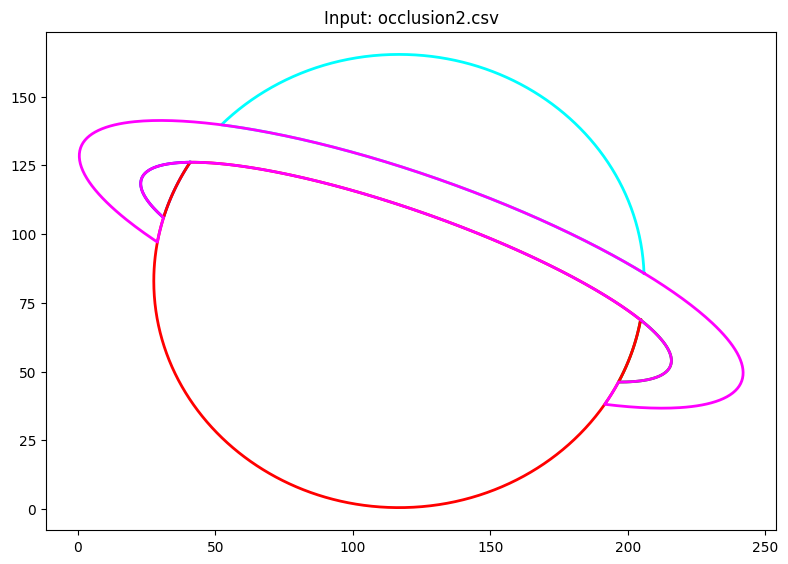

Path shape: (1, 58, 2)
Path has fewer than 2 points. Skipping this path.
Path shape: (1, 67, 2)
Path has fewer than 2 points. Skipping this path.
Path shape: (1, 485, 2)
Path has fewer than 2 points. Skipping this path.
Path shape: (1, 378, 2)
Path has fewer than 2 points. Skipping this path.
Path shape: (1, 648, 2)
Path has fewer than 2 points. Skipping this path.


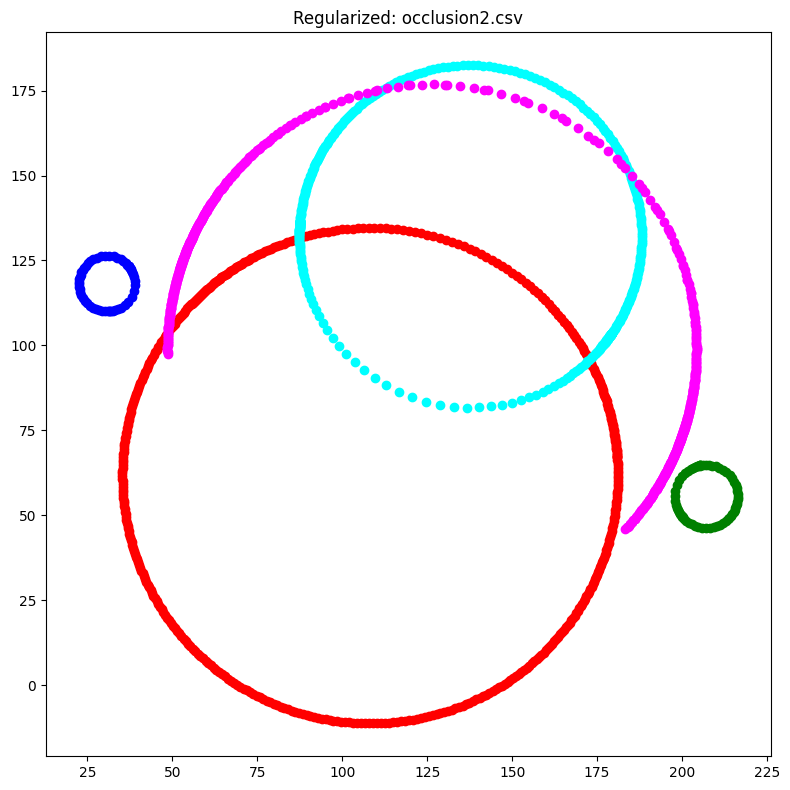

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# Main processing function
import os
def process_files(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith('.csv') and not filename.endswith('_sol.csv'):
            input_path = os.path.join(input_dir, filename)
            output_base = os.path.splitext(filename)[0] + '_regularized'

            # Read input curves
            input_curves = read_csv(input_path)

            # Plot input curves
            plot(input_curves, f'Input: {filename}')

            # Regularize curves
            regularized_curves = regularize_curves(input_curves)

            # Plot regularized curves
            plot(regularized_curves, f'Regularized: {filename}')

            # Save regularized curves as SVG and PNG
            output_svg = os.path.join(output_dir, output_base + '.svg')
            polylines2svg(regularized_curves, output_svg)

            print(f'Processed {filename}')
# Run the processing
input_dir = '/content/problems'
output_dir = '/content/regularized_output'
process_files(input_dir, output_dir)

# Download the results
files.download('/content/regularized_output')